# Восстановление золота из руды



Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

Подготовить данные;
Провести исследовательский анализ данных;
Построить и обучить модель.

## Подготовка данных

In [1]:
import os
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.dummy import DummyRegressor
#!pip install pandas-profiling[notebook]
#from pandas_profiling import ProfileReport
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [2]:
pth1_train = '/datasets/gold_recovery_train_new.csv'
pth2_train = 'gold_recovery_train_new.csv'

if os.path.exists(pth1_train):
    data_train = pd.read_csv(pth1_train)
elif os.path.exists(pth2_train):
    data_train = pd.read_csv(pth2_train)
else:
    print('Something is wrong')
    
pth1_test= '/datasets/gold_recovery_test_new.csv'
pth2_test = 'gold_recovery_test_new.csv'

if os.path.exists(pth1_test):
    data_test = pd.read_csv(pth1_test)
elif os.path.exists(pth2_test):
    data_test = pd.read_csv(pth2_test)
else:
    print('Something is wrong')
    
pth1_full = '/datasets/gold_recovery_full_new.csv'
pth2_full = 'gold_recovery_full_new.csv'

if os.path.exists(pth1_full):
    data_full = pd.read_csv(pth1_full)
elif os.path.exists(pth2_full):
    data_full = pd.read_csv(pth2_full)
else:
    print('Something is wrong')

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [5]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [6]:
data_train['recovery'] = (data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au'] - 
                         data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au'] - 
                        data_train['rougher.output.tail_au']))*100
data_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,recovery
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,87.107763
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,87.226430
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,86.688794


In [7]:
mean_absolute_error(data_train['rougher.output.recovery'], data_train['recovery'])

9.73512347450521e-15

In [8]:
train_nottest = set(data_train.columns) - set(data_test.columns)
train_nottest

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'roug

- В тестовой выборке не хватает вызвода сырья на всех этапах обработки. Они получаются позже, на реальной задаче предсказывать придется без них. 
- Не хватает Целевых признаков, которые нужно предсказать.

In [9]:
data_test['date'].duplicated().sum()

0

In [10]:
data_train['date'].duplicated().sum()

0

In [11]:
data_full['date'].duplicated().sum()

0

In [12]:
data_train = data_train.fillna(method='bfill')
data_test = data_test.fillna(method='bfill')
data_full = data_full.fillna(method='bfill')

- из задания мы знаем, что " Соседние по времени параметры часто похожи.", по этому пропуски можно заполнить соседними значениями 

- открыл и сохранил данные в переменных `data_trainm`, `data_test`, `data_full`
- посмотрел информацию о данных. В данных есть пропуски 
- создал колонку recovery(эффективность обогащения)
- сравнил метрикой MAE данные `data_train['recovery']` и `train['rougher.output.recovery']`. Значение МАЕ не велико, расчеты верны
- проверил, каких колонок не хватало в data_test по сравнению м data_train. В data_test не хватает колонок с целевыми признаками, не хватает данных о получении продукта после обработки(output)
- заполнил пропуски данными из соседних ячеик 

## Анализ данных

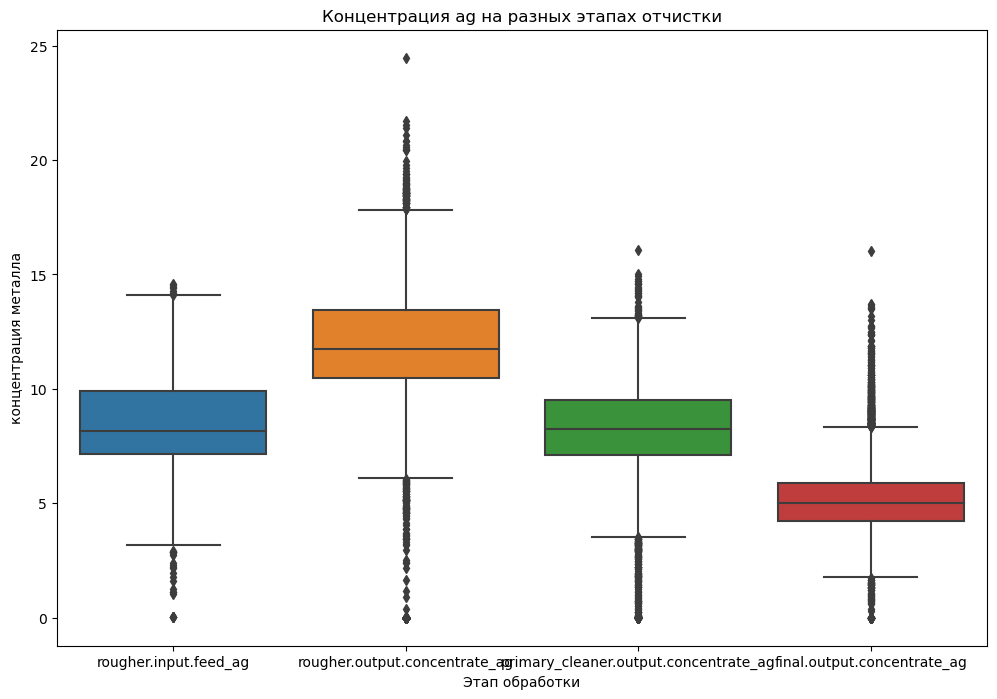

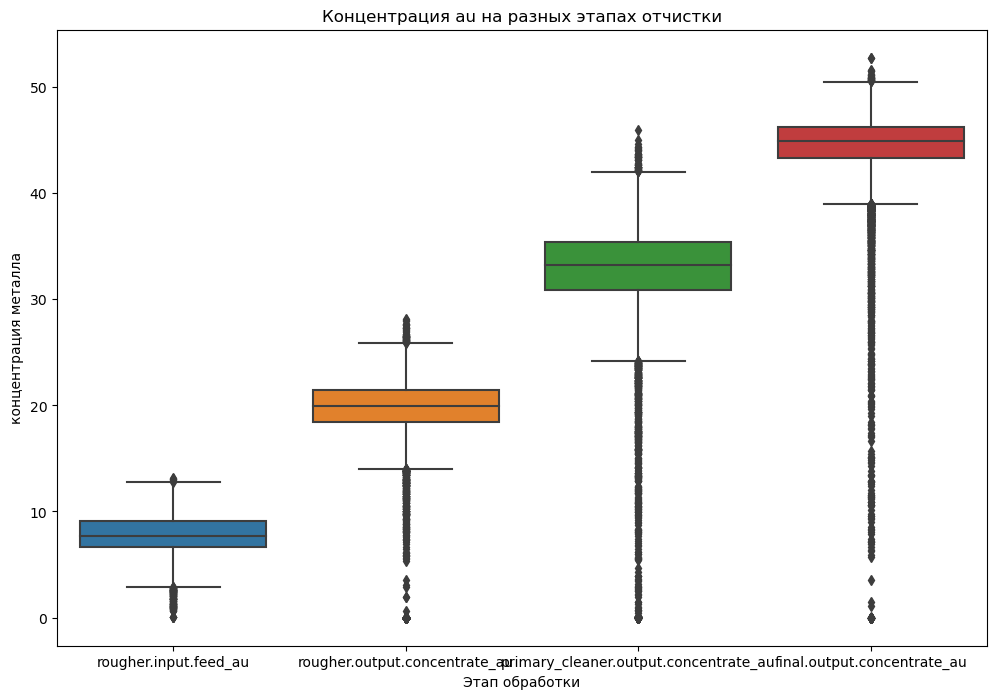

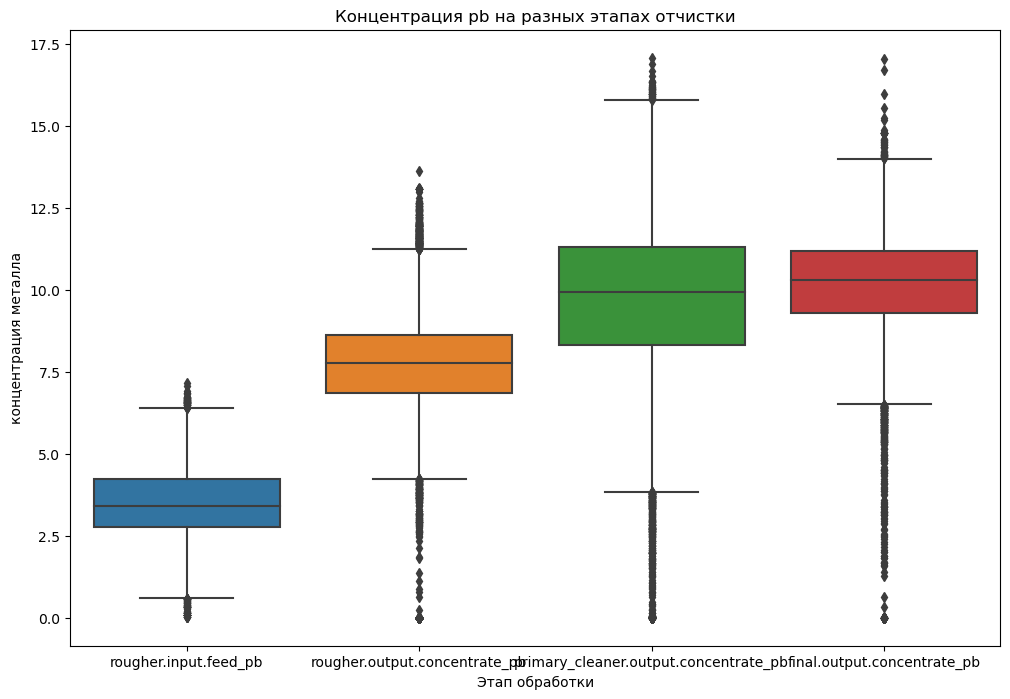

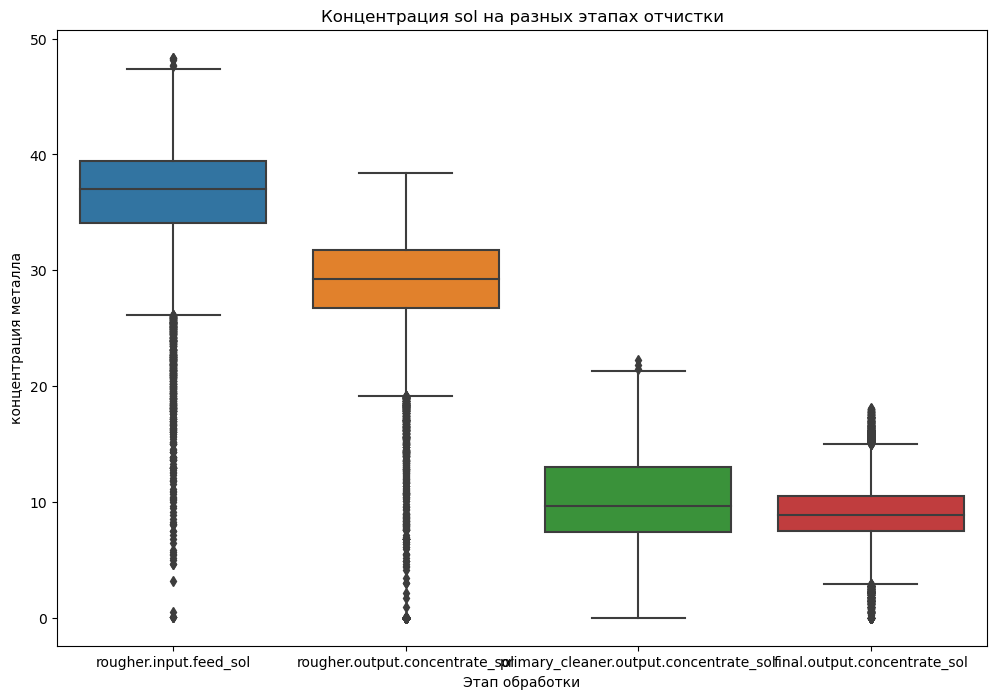

In [13]:
metals = {'ag':['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag' ],
               'au':['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au' ],
               'pb':['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb' ],
               'sol':['rougher.input.feed_sol', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_sol']}
 
for metal in metals:
    plt.figure(figsize=(12,8))
    sns.boxplot(data = data_train[metals[metal]])
    plt.title(f'Концентрация {metal} на разных этапах отчистки')
    plt.xlabel('Этап обработки')
    plt.ylabel('концентрация металла')
    plt.show()

- Концентрация серебра(Ag) с каждым этапом снижается
- Концентрация золота(Au) с каждым этапом значительно увеличивается
- концентрация свинца(Pb) немного увнличивается внячале, потом остается почти неизменной ( но в целом изменения не значительны)
- Остальные примеси(Sol) резко снижается на первых этапах 

In [14]:
def destribution(test_column, train_column, lim, name):
    
    plt.figure(figsize=(15, 5))
    sns.kdeplot(train_column, label=f'{name}.input.feed_size - Train', alpha=0.5, shade=True)
    sns.kdeplot(test_column, label=f'{name}.input.feed_size - Test', alpha=0.3, shade=True)
    plt.xlim([0, lim])
    plt.title(f'Размер Гранул Сырья')
    plt.xlabel('Значения')
    plt.ylabel('Плотность')
    plt.legend(loc='upper right')
    plt.show()

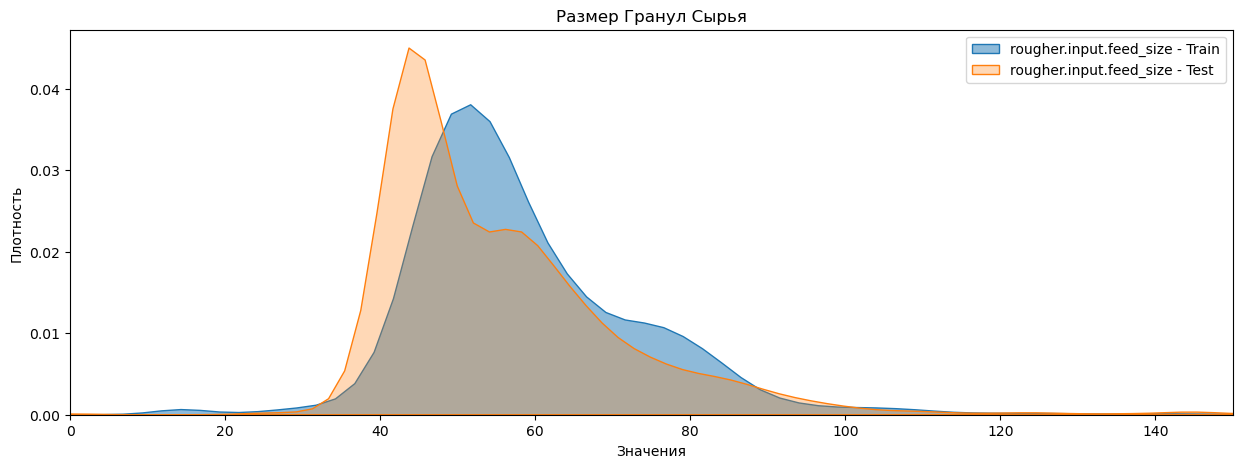

In [15]:
destribution(data_test['rougher.input.feed_size'], 
             data_train['rougher.input.feed_size'],
             150,
             'rougher'
            )

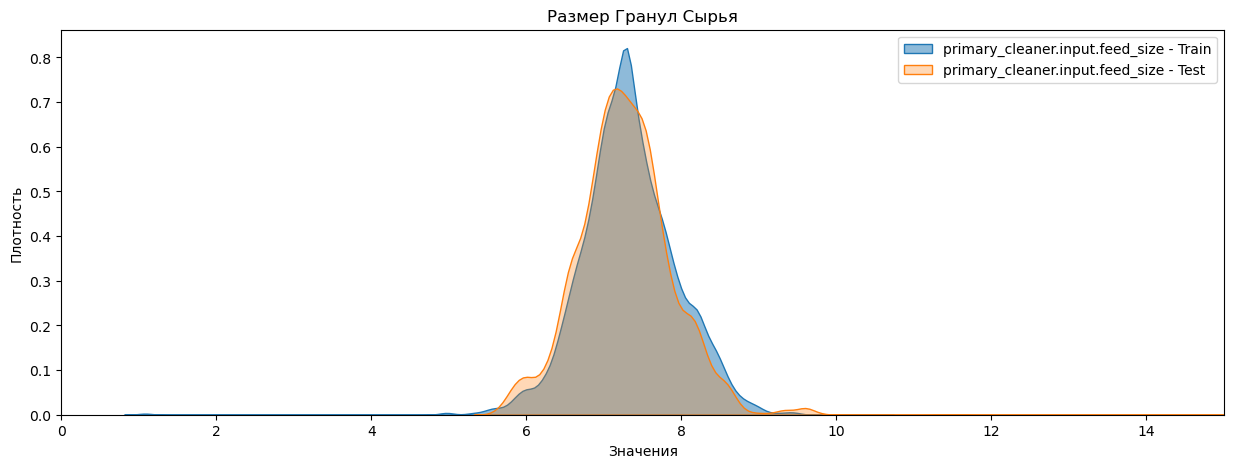

In [16]:
destribution(data_test['primary_cleaner.input.feed_size'], 
             data_train['primary_cleaner.input.feed_size'],
             15,
             'primary_cleaner'
            )

- Размеры гранул на обучающей и тестовой выборке схожи

In [17]:
rougher_feed = []
rougher_output = []
final_output = []
for column in data_full.columns:
    if 'rougher.output.concentrate' in column:
        rougher_output.append(column)
    elif 'final.output.concentrate' in column:
        final_output.append(column)
    elif 'rougher.input.feed' in column:
        rougher_feed.append(column)
        
def hist(stage, name):        
    for key in stage:
        data_full['sum.concentrate'] =+ data_full[key]
    
    plt.figure(figsize=(15,5))
    data_full['sum.concentrate'].hist(bins=30, label='sum_concentrate', alpha=0.4)
    plt.title(f'сумарная концентрация {name}')
    plt.xlabel('Значения')
    plt.ylabel('Количество')
    plt.legend(loc='upper left')
    plt.show()

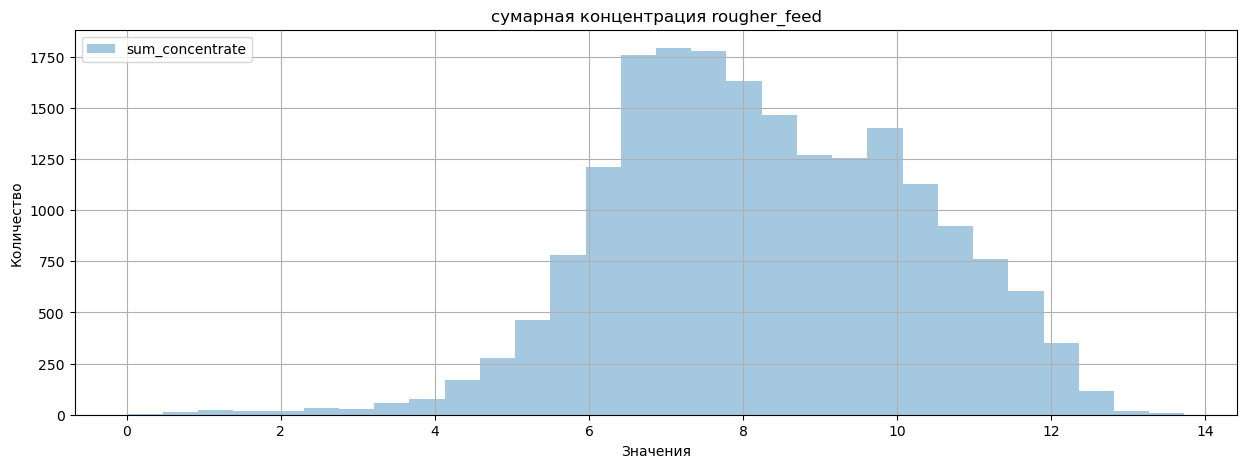

In [18]:
hist(rougher_feed, 'rougher_feed')

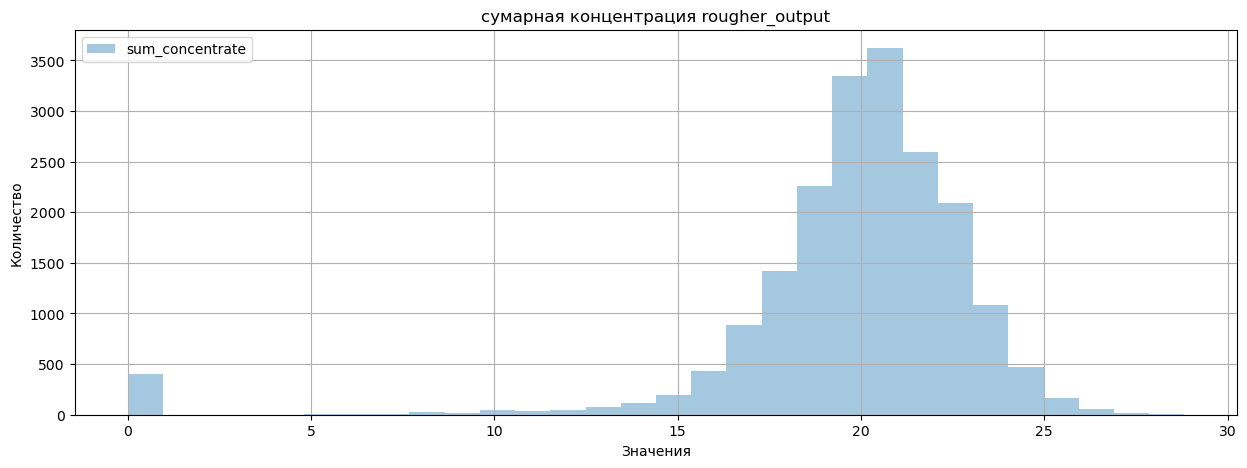

In [19]:
hist(rougher_output, 'rougher_output')

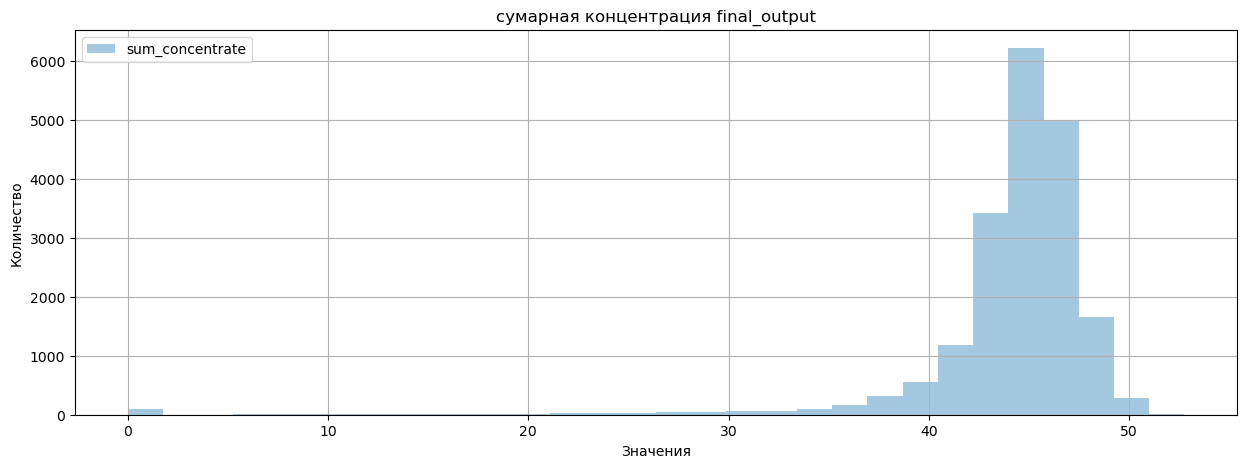

In [20]:
hist(final_output, 'final_output')

- Концентрация металлов на каждом этапе увеличивается
- Есть много нулей, которые можно удалить 

In [21]:
data_full = data_full.set_index('date')
data_test = data_test.set_index('date')
data_train = data_train.set_index('date')

data_train.update(data_full)
data_test['final.output.recovery'] = data_full['final.output.recovery']
data_test['rougher.output.recovery'] = data_full['rougher.output.recovery']
train_nottest -= {'rougher.output.recovery', 'final.output.recovery'}

for i in train_nottest:
    data_train = data_train.drop(i, axis=1)

In [22]:
def drop_unnecessary(data):
    
    data = data.dropna(subset = ['final.output.recovery', 'rougher.output.recovery'])
    data = data.loc[(data['final.output.recovery'] > 0) & (data['rougher.output.recovery'] > 0)]
    data.info()
    return data

In [23]:
drop_unnecessary(data_train)

<class 'pandas.core.frame.DataFrame'>
Index: 13795 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       13795 non-null  float64
 1   primary_cleaner.input.sulfate               13795 non-null  float64
 2   primary_cleaner.input.depressant            13795 non-null  float64
 3   primary_cleaner.input.feed_size             13795 non-null  float64
 4   primary_cleaner.input.xanthate              13795 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13795 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13795 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13795 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13795 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13795 non-nu

,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,66.927016,117.988169,11.913613,7.25,1.009869,1601.339707,-498.975456,1601.437854,-500.323246,1599.581894,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,73.755150,123.381787,8.028927,6.50,1.304232,1648.421193,-400.382169,1648.742005,-400.359661,1648.578230,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
2018-08-18 07:59:59,69.049291,120.878188,7.962636,6.50,1.302419,1649.820162,-399.930973,1649.357538,-399.721222,1648.656192,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
2018-08-18 08:59:59,67.002189,105.666118,7.955111,6.50,1.315926,1649.166761,-399.888631,1649.196904,-399.677571,1647.896999,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452


In [24]:
drop_unnecessary(data_test)

<class 'pandas.core.frame.DataFrame'>
Index: 5154 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5154 non-null   float64
 1   primary_cleaner.input.depressant            5154 non-null   float64
 2   primary_cleaner.input.feed_size             5154 non-null   float64
 3   primary_cleaner.input.xanthate              5154 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5154 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5154 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5154 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5154 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5154 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5154 non-null

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,70.273583,89.993421
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,68.910432,88.089657
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,68.143213,88.412756
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,67.776393,87.360133
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,61.467078,83.236367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,-499.599127,...,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909,68.919891,95.172585
2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,-503.587739,...,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761,68.440582,94.575036
2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,...,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,67.092759,93.018138


In [25]:
drop_unnecessary(data_full)

<class 'pandas.core.frame.DataFrame'>
Index: 18949 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         18949 non-null  float64
 1   final.output.concentrate_pb                         18949 non-null  float64
 2   final.output.concentrate_sol                        18949 non-null  float64
 3   final.output.concentrate_au                         18949 non-null  float64
 4   final.output.recovery                               18949 non-null  float64
 5   final.output.tail_ag                                18949 non-null  float64
 6   final.output.tail_pb                                18949 non-null  float64
 7   final.output.tail_sol                               18949 non-null  float64
 8   final.output.tail_au                             

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,sum.concentrate
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,42.192020
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,42.701629
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,42.657501
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129,42.689819
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691,42.774141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,123.381787,...,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428,46.713954
2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,120.878188,...,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608,46.866780
2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,105.666118,...,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,46.795691


- Построил графики "Ящик с усами". Концентрация золота в сырье с каждом этапом ростет 
- Построил графики распределения размеров гранул сырья на обучающей и тестовой выборках. Разница не значительна
- Построил графики суммарной концентрации металлов в сырье на разных стадиях обработки. Концентрация ростет
- Удалил из данных нули и пропущеные значения 

## Модель

In [26]:
def smape(target, pred):
    
    smape = (abs(target-pred)/((abs(target)+abs(pred))/2)*100).fillna(value=0)
    smape = np.mean(smape)
    return smape

In [27]:
def cross_validation (model, features, target):
    scores = abs(cross_val_score(model, 
                             features, 
                             target, 
                             scoring=make_scorer(smape, greater_is_better=False), 
                             cv=5,
                            )
                )
    smape_res = np.mean(scores)
    return smape_res

In [28]:
def result_smape(model):
    smape_rougher = cross_validation (model, train_features_rougher, train_target_rougher)
    smape_final = cross_validation (model, train_features_final, train_target_final)
    smape_end = 0.25 * smape_rougher + 0.75 * smape_final
    print('Конечная оценка качества по кросс-валидации составила', round(smape_end, 3))

In [29]:
features_rougher = []
for column in data_test.columns:
    if "rougher" in column:
        features_rougher.append(column)

train_features_rougher = data_train[features_rougher]
train_target_rougher = data_train['rougher.output.recovery']
train_features_final = data_train[data_test.columns].drop(['rougher.output.recovery','final.output.recovery'], axis=1)
train_target_final = data_train['final.output.recovery']


test_features_rougher = data_test[features_rougher]
test_target_rougher = data_test['rougher.output.recovery']
test_features_final = data_test.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
test_target_final = data_test['final.output.recovery']

In [30]:
model = LinearRegression()
result_smape(model)

Конечная оценка качества по кросс-валидации составила 10.199


In [31]:
model = DecisionTreeRegressor(random_state = 12345)
result_smape(model)

Конечная оценка качества по кросс-валидации составила 16.281


In [32]:
model = RandomForestRegressor(random_state = 12345)
result_smape(model)

Конечная оценка качества по кросс-валидации составила 9.664


- Лучше всего себя показал "Рендомный лес"

In [33]:
best_smape = 10
best_est = 0
best_depth = 0
best_model = []
for est in range(10, 51, 10):
    for depth in range (1, 7):
        model = RandomForestRegressor(n_estimators=est, max_depth=depth)
        smape_rougher = cross_validation (model, train_features_rougher, train_target_rougher)
        smape_final = cross_validation (model, train_features_final, train_target_final)
        smape_end = 0.25 * smape_rougher + 0.75 * smape_final
        if smape_end < best_smape:
            best_smape = smape_end
            best_est = est
            best_depth = depth
            best_model = model
print(f'Лучшая модель: {best_model}')
print(f'sMAPE: {best_smape}')

Лучшая модель: RandomForestRegressor(max_depth=6, n_estimators=10)
sMAPE: 7.9882270387097


In [34]:
def result_smape_test(model):
    
    model_rougher = model
    model_rougher.fit(train_features_rougher, train_target_rougher)
    predictions_rougher = model_rougher.predict(test_features_rougher)
    
    model_final = model
    model_final.fit(train_features_final, train_target_final)
    predictions_final = model_final.predict(test_features_final)
    
    smape_rougher = smape(test_target_rougher, predictions_rougher)
    smape_final = smape(test_target_final, predictions_final)
    smape_end = 0.25 * smape_rougher + 0.75 * smape_final
    print('sMAPE: ', smape_end)

In [35]:
model = DummyRegressor()
result_smape_test(model)

sMAPE:  10.289630376021034


In [36]:
model = RandomForestRegressor(n_estimators=best_est, max_depth=best_depth)
result_smape_test(model)

sMAPE:  7.342817722573165


## Вывод

- Написал функциb для определения sMAPE, Кросс валидации и Итогового sMAPE
- Разделил данные на признаки и целевые признаки
- Обучил разные модели, сравнил их результаты с Dummy моделью. Лучший результат показал модель "Рендомный лес"
- Подобрал лучшие гиперпараметры для обучения модели RendomForest
- Проверил модель на тестовой выборкеб сравнил ее с Dummy моделью 